Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
34


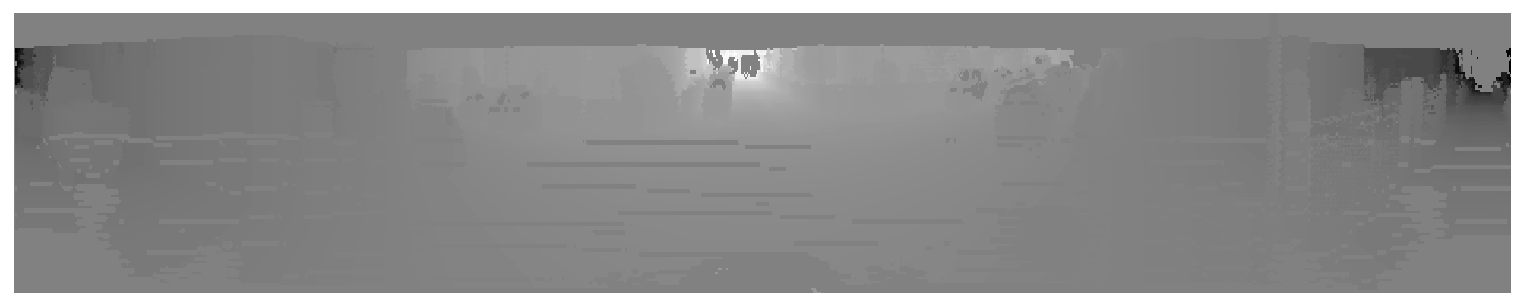

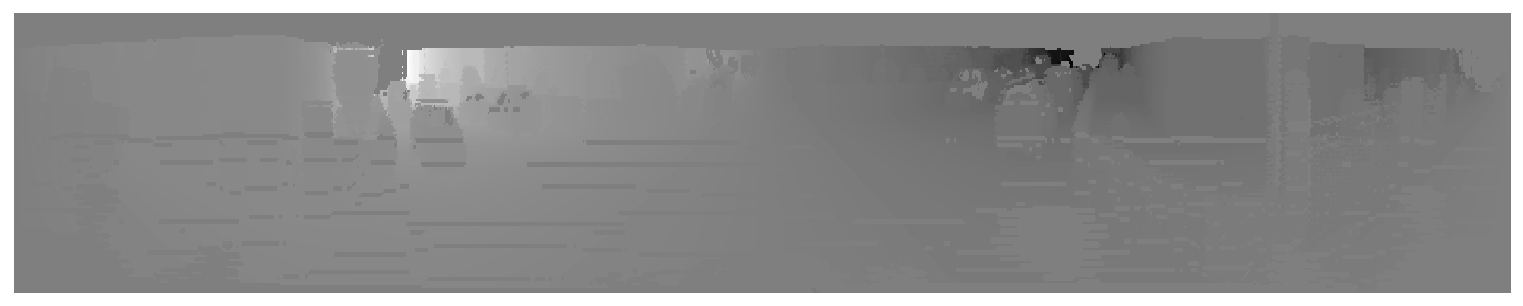

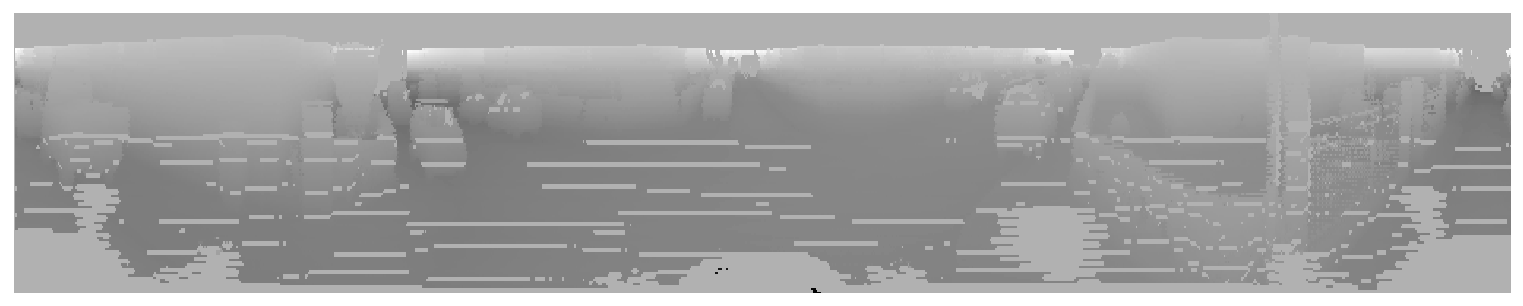

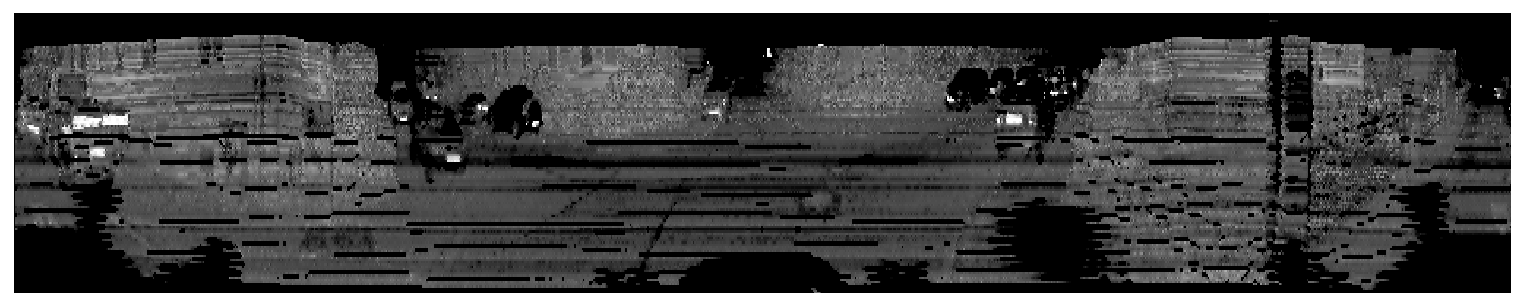

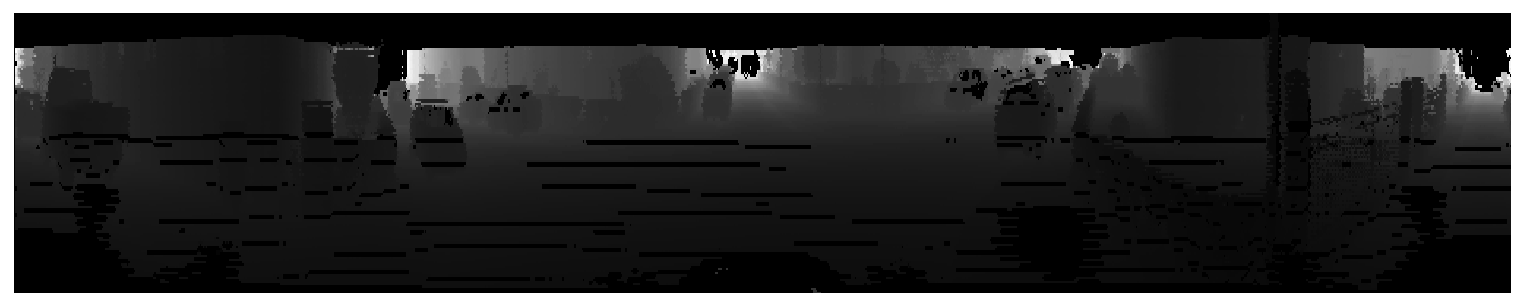

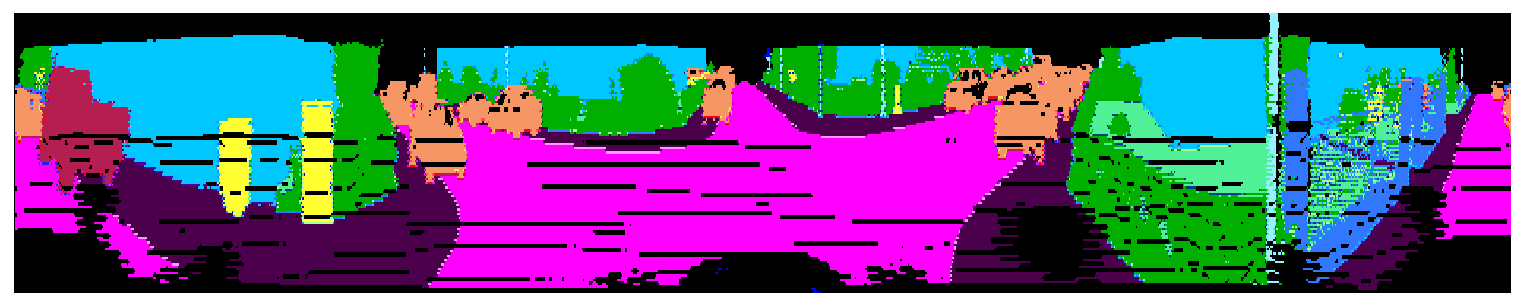

In [1]:
import os
import os.path as osp

import sys
sys.path.append("..")

import torch
import torch.utils.data

import numpy as np

import core
import utils

import matplotlib.pyplot as plt

def visualize(gdth: np.ndarray, pallete: dict):
    img = np.zeros((*gdth.shape[:2], 3), dtype=np.uint8)
    for idx, color in pallete.items():
        img[gdth == idx] = np.array(color)
    return img

def show_spherical_proj(img: np.ndarray):
    HEI, WID = img.shape[:2]
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([WID, 0, 0, HEI])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')

args_dataset = core.readconfyaml.read("../conf/dataset/KITTISemantic.yaml")
args_dataset.root = "../data/kittisem"
dataset = core.dataset.KITTISemantic(
    **args_dataset,
    split="train"
)
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True
)
print(len(args_dataset.cls_names))
for iter, (fmap, gdth) in enumerate(loader):
    show_spherical_proj(fmap[0][0]) # x
    show_spherical_proj(fmap[0][1]) # y
    show_spherical_proj(fmap[0][2]) # z
    show_spherical_proj(fmap[0][3]) # i
    show_spherical_proj(fmap[0][4]) # r
    show_spherical_proj(visualize(gdth[0], dataset.pallete))
    break